<a href="https://colab.research.google.com/github/jdasam/mas1004-2022/blob/main/notebooks/Data_AI_9th_week_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

DEV = 'cuda'

In [4]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

In [5]:
# See how our data looks like
# you can get the i-th data from the dataset class using dataset[i]
train_data[0] # this will return (image tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
img, label = train_data[0] # A datasample is a pair of image and label

In [7]:
img.shape

torch.Size([1, 28, 28])

In [8]:
# you can delete axis that has only one item by squeeze
img = img.squeeze() # or img = img[0] or img = img[0, :, : ]
img.shape

torch.Size([28, 28])

Label is 5


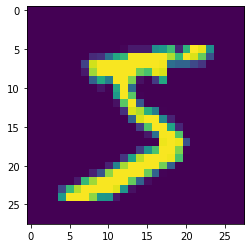

In [9]:
plt.imshow(img), 
print(f'Label is {label}') # f means formatted string

Label is 5


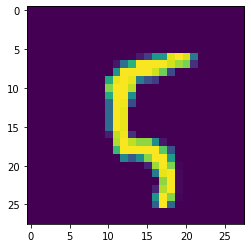

In [10]:
data_idx = 100
img, label = train_data[data_idx]
plt.imshow(img.squeeze())
print(f'Label is {label}')



In [11]:
# how many data exists in our train_data?
len(train_data)

60000

In [12]:
img.shape

torch.Size([1, 28, 28])

In [13]:
# We have to convert a tensor of 28, 28 to a tensor of 784

# we can reshape a tensor to have a specific shape
img.reshape(784)
img.reshape(-1) # automatically decide the size of that dimension 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
img.numel()

784

In [15]:
# reshape is a function that converts a shape of tensor into specific shape
img.reshape(1,2,14,28)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
test = torch.arange(12)
test

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [17]:
test.reshape(2, 6), test.reshape(3,4), test.reshape(2,2,3)

(tensor([[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11]]), tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]), tensor([[[ 0,  1,  2],
          [ 3,  4,  5]],
 
         [[ 6,  7,  8],
          [ 9, 10, 11]]]))

In [18]:
test.reshape(3, -1) # automatically decides the size of last dimension


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [19]:
# we can flatten the img by reshape(-1)
flattened_img = img.reshape(-1)
flattened_img.shape, flattened_img

(torch.Size([784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        

In [20]:
# let's collect 1000 data from train_data

count = 0
img_list = []
label_list = []

for data in train_data:
  img, label = data
  # print(label, img.shape)
  img_list.append(img)
  label_list.append(label)
  count += 1
  if count >= 1000:
    break

In [21]:
len(img_list), len(label_list)

(1000, 1000)

In [22]:
# img list is a list of tensor
type(img_list), type(img_list[0])

# we want to convert a list of tensor to a single tensor

(list, torch.Tensor)

In [23]:
# two ways to convert a list of tensor to a single tensor
# torch.cat() concatenates a list of tensor to an existing dim
# torch.stack() concatenates a list of tensor to a new dim

out = torch.cat(img_list, dim=0)
out.shape

torch.Size([1000, 28, 28])

In [24]:
(out[100] == img_list[100]).all()

tensor(True)

In [25]:
# flatten that out tensor so that each datasample has 784 numbers
flattened_data = out.reshape(1000, 784) # out.reshape(1000, -1)
flattened_data.shape


torch.Size([1000, 784])

In [26]:
# what is difference between reshape(1000, 784) and reshape(784, 1000)
test = torch.arange(784).repeat(1000, 1)
test, test.shape

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]), torch.Size([1000, 784]))

In [27]:
test_flattened = test.reshape(-1) # 784000 dim vector
test_flattened.shape

torch.Size([784000])

In [28]:
reshaped_a = test_flattened.reshape(1000, 784)
reshaped_b = test_flattened.reshape(784, 1000)
reshaped_a, reshaped_b

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 tensor([[  0,   1,   2,  ..., 213, 214, 215],
         [216, 217, 218,  ..., 429, 430, 431],
         [432, 433, 434,  ..., 645, 646, 647],
         ...,
         [136, 137, 138,  ..., 349, 350, 351],
         [352, 353, 354,  ..., 565, 566, 567],
         [568, 569, 570,  ..., 781, 782, 783]]))

In [29]:
dummy = torch.arange(12)
print(dummy)
print(dummy.reshape(3,4))
print(dummy.reshape(4,3))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [30]:
label_tensor = torch.tensor(label_list)
flattened_data.shape, label_tensor.shape

(torch.Size([1000, 784]), torch.Size([1000]))

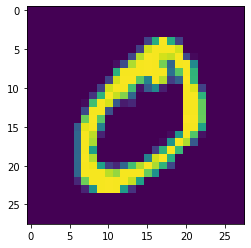

In [31]:
first_data = flattened_data[1]
plt.imshow(first_data.reshape(28, 28))

In [32]:
first_data.shape, first_data

(torch.Size([784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        

In [33]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=784, out_features=64)
    self.layer2 = nn.Linear(in_features=64, out_features=77)
    self.final_layer = nn.Linear(in_features=77, out_features=10)
    self.relu = nn.ReLU()


  def forward(self, x): # x is an input
    # x is a tensor with a shape of [Num samples, 784]
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.final_layer(out)

    # we want to predict the probability of each category label for a given input
    # we have 10 different categories in our dataset
    return out

model = Classifier()
out = model(flattened_data)
out[0] # the output for 0-th data sample

tensor([-0.0428, -0.0331,  0.0458,  0.1396,  0.1470,  0.0238,  0.0751, -0.1053,
        -0.0528,  0.0263], grad_fn=<SelectBackward0>)

In [34]:
# We want to convert the output into a range of probability
# Why we use softmax function
torch.softmax(out[0], dim=-1)

tensor([0.0934, 0.0943, 0.1021, 0.1121, 0.1129, 0.0998, 0.1051, 0.0877, 0.0925,
        0.1001], grad_fn=<SoftmaxBackward0>)

In [35]:
torch.set_printoptions(sci_mode=False)
def my_softmax(x, dim=0):
  # calculate exponential of each item in the tensor
  exponential_value = torch.exp(x)
  sum_exponential = torch.sum(exponential_value, dim=dim)
  sum_exponential_unsqueezed = sum_exponential.unsqueeze(1)
  # print(exponential_value.shape, sum_exponential_unsqueezed.shape)
  softmax_value = exponential_value / sum_exponential_unsqueezed
  # return exponential_value, sum_exponential, softmax_value
  return softmax_value
my_softmax(out, dim=1)

tensor([[0.0934, 0.0943, 0.1021,  ..., 0.0877, 0.0925, 0.1001],
        [0.0926, 0.0896, 0.1021,  ..., 0.0867, 0.0926, 0.1012],
        [0.0957, 0.0991, 0.1028,  ..., 0.0870, 0.0908, 0.0969],
        ...,
        [0.0935, 0.0940, 0.1009,  ..., 0.0810, 0.0943, 0.1011],
        [0.0928, 0.0950, 0.1035,  ..., 0.0867, 0.0931, 0.1006],
        [0.0933, 0.0958, 0.1015,  ..., 0.0793, 0.0954, 0.1011]],
       grad_fn=<DivBackward0>)

In [36]:
softmax_out = my_softmax(out, dim=1)
softmax_out[17]

tensor([0.0943, 0.0963, 0.1002, 0.1089, 0.1133, 0.1037, 0.1050, 0.0858, 0.0926,
        0.0999], grad_fn=<SelectBackward0>)

In [37]:
# we have to calculate the loss
label_tensor[:5]

tensor([5, 0, 4, 1, 9])

In [38]:
print(softmax_out[0]) # probability output of 0-th data sample
print(label_tensor[0])

tensor([0.0934, 0.0943, 0.1021, 0.1121, 0.1129, 0.0998, 0.1051, 0.0877, 0.0925,
        0.1001], grad_fn=<SelectBackward0>)
tensor(5)


## Dataset

In [42]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [45]:
def get_nll_loss(pred, target):
  return -pred[torch.arange(len(target)), target].log().mean()

In [47]:
from tqdm.auto import tqdm

num_epochs = 5

model = Classifier()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.to(DEV)
loss_record = []
for i in tqdm(range(num_epochs)):
  for batch in tqdm(train_loader, leave=False):
    img, label = batch
    pred = model(img.reshape(-1, 784).to(DEV))
    prob = pred.softmax(dim=-1)
    loss = get_nll_loss(prob, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item())

    

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

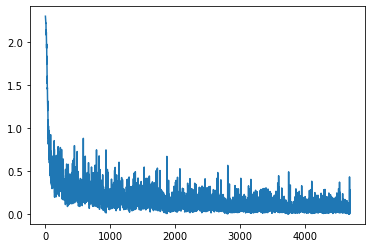

In [48]:
import matplotlib.pyplot as plt

plt.plot(loss_record)